[**Demo %s**](#demo-improper-intinf)

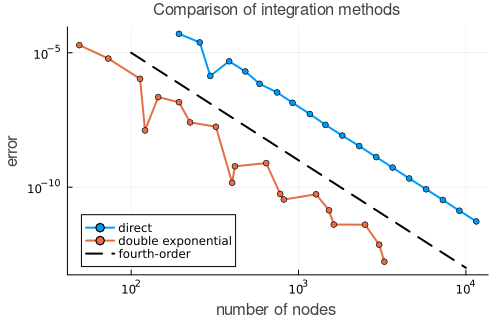

In [2]:
f(x) = 1 / (1 + x^2)
tol = [1 / 10^d for d in 5:0.5:14]
err = zeros(length(tol), 2)
len = zeros(Int, length(tol), 2)
for (i, tol) in enumerate(tol)
    I1, x1 = FNC.intadapt(f, -2/tol, 2/tol, tol)
    I2, x2 = FNC.intinf(f, tol)
    @. err[i,:] = abs(π - [I1, I2])
    @. len[i,:] = length([x1, x2])
end
plot(len, err, m=:o, label=["direct" "double exponential"])
n = [100, 10000]
plot!(n, 1000n.^(-4), 
    color=:black,  l=:dash,
    label="fourth-order",  legend=:bottomleft,
    xaxis=(:log10, "number of nodes"), 
    yaxis=(:log10, "error"),
    title="Comparison of integration methods")

Both methods are roughly fourth-order due to Simpson's formula in the underlying adaptive integration method. At equal numbers of evaluation nodes, however, the double exponential method is consistently 2--3 orders of magnitude more accurate.